In [1]:
# import the required packages
import numpy as np
import pandas as pd
import re # string manipulation
import matplotlib.pyplot as plt # graph
import seaborn as sns

## 1. HR Analytics

### 1.1 Load and Explore the data

In [2]:
# Load dataset into a DataFrame
df_hr = pd.read_csv('hr_data.csv')
# Show overview of the dataset
df_hr.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [3]:
#Get information about the features such as dType and count.
df_hr.info()
#Get the statistical values about the features.
df_hr.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [4]:
#Since this is a classification problem, this function returns the counts of the values in the dataframe.
#So here we can see that 50140 people are not promoted and 4668 people are promoted.
df_hr['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

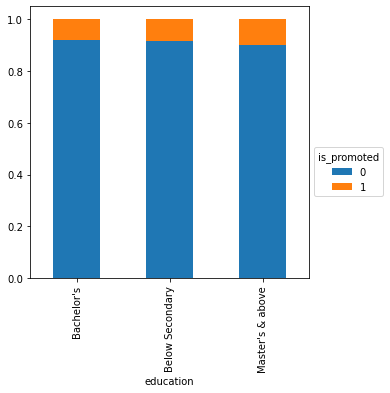

In [5]:
#We can check using visualization how many people are promoted in each education level, so here the y-axis shows that out of 10 ppoeple the blue part is the 
#amount of people not promoted and the orange is the people that are promoted.
plt.rcParams['figure.figsize'] = [5, 5]
edu = pd.crosstab(df_hr.education,df_hr.is_promoted,normalize='index')
edu.plot.bar(stacked=True)
plt.legend(title='is_promoted',bbox_to_anchor=(1,0.5))


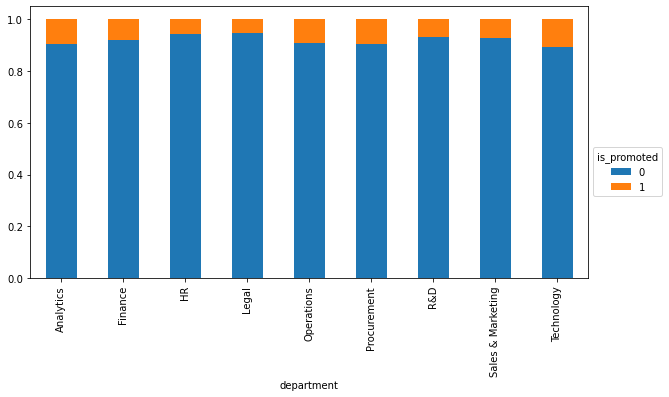

In [6]:
#We can check using visualization how many people are promoted in each department
plt.rcParams['figure.figsize'] = [10, 5]
ct = pd.crosstab(df_hr.department,df_hr.is_promoted,normalize='index')
ct.plot.bar(stacked=True)
plt.legend(title='is_promoted',bbox_to_anchor=(1,0.5))

### 1.2 Cleanse and Transform the data

In [7]:
#Find the number of missing values
df_hr.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [8]:
#Find the count for each values of education and rating.
print(df_hr['education'].value_counts())
print(df_hr['previous_year_rating'].value_counts())

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64
3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64


In [9]:
#fill in the missing values with appropriate data.
df_hr['education'].fillna(df_hr['education'].mode()[0], inplace = True)
df_hr['previous_year_rating'].fillna(df_hr['previous_year_rating'].median(), inplace = True)
#recheck the dataFrame to see that there are no missing values.
df_hr.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [10]:
#To do the Stratified Sampling, get the values of "is_promoted" in 2 seperate dataFrames.
df_promoted=df_hr[df_hr['is_promoted']==1]
df_promoted.head()

df_notPromoted=df_hr[df_hr['is_promoted']==0]
df_notPromoted.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [11]:
#here we will be doing the stratified sampling using the variables initialized earlier.
df_sampled = df_notPromoted.sample(n=len(df_promoted), random_state=2).copy() # extracting 4668 random sample from people not promoted
df_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4668 entries, 6725 to 12976
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           4668 non-null   int64  
 1   department            4668 non-null   object 
 2   region                4668 non-null   object 
 3   education             4668 non-null   object 
 4   gender                4668 non-null   object 
 5   recruitment_channel   4668 non-null   object 
 6   no_of_trainings       4668 non-null   int64  
 7   age                   4668 non-null   int64  
 8   previous_year_rating  4668 non-null   float64
 9   length_of_service     4668 non-null   int64  
 10  KPIs_met >80%         4668 non-null   int64  
 11  awards_won?           4668 non-null   int64  
 12  avg_training_score    4668 non-null   int64  
 13  is_promoted           4668 non-null   int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 547.0+ KB


In [12]:
df_new=pd.concat([df_promoted,df_sampled],axis=0)  #combine the df1 and df0 into a single dataframe
df_new['is_promoted'].value_counts()

1    4668
0    4668
Name: is_promoted, dtype: int64

In [13]:
#Mapping the educational quatifications to 1,2 and 3 with 1 being the highest qualification
title_mapping = {"Master's & above": 1, "Bachelor's": 2, "Below Secondary": 3}
df_new['education'] = df_new['education'].map(title_mapping).astype(int)
df_new.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
11,49017,Sales & Marketing,region_7,2,f,sourcing,1,35,5.0,3,1,0,50,1
39,58304,Sales & Marketing,region_28,2,m,sourcing,1,33,5.0,6,1,0,51,1
60,17673,Sales & Marketing,region_4,1,m,other,1,50,4.0,17,1,0,47,1
66,77981,Finance,region_22,2,m,other,1,27,3.0,1,1,1,58,1
67,16502,Sales & Marketing,region_22,2,m,sourcing,1,27,3.0,1,0,0,61,1


In [14]:
#Mapping the gender of male and female to 0 and 1 where 0 is male and 1 is female
df_new['gender'] = df_new['gender'].map({"m": 0, "f":1}).astype(int)
df_new.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
11,49017,Sales & Marketing,region_7,2,1,sourcing,1,35,5.0,3,1,0,50,1
39,58304,Sales & Marketing,region_28,2,0,sourcing,1,33,5.0,6,1,0,51,1
60,17673,Sales & Marketing,region_4,1,0,other,1,50,4.0,17,1,0,47,1
66,77981,Finance,region_22,2,0,other,1,27,3.0,1,1,1,58,1
67,16502,Sales & Marketing,region_22,2,0,sourcing,1,27,3.0,1,0,0,61,1


In [15]:
#Mapping the values of recruitment_channel to 1,2 and 3
title_mapping = {"sourcing": 1, "referred": 2, "other": 3}
df_new['recruitment_channel'] = df_new['recruitment_channel'].map(title_mapping).astype(int)
df_new.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
11,49017,Sales & Marketing,region_7,2,1,1,1,35,5.0,3,1,0,50,1
39,58304,Sales & Marketing,region_28,2,0,1,1,33,5.0,6,1,0,51,1
60,17673,Sales & Marketing,region_4,1,0,3,1,50,4.0,17,1,0,47,1
66,77981,Finance,region_22,2,0,3,1,27,3.0,1,1,1,58,1
67,16502,Sales & Marketing,region_22,2,0,1,1,27,3.0,1,0,0,61,1


In [16]:
#Mapping the values of departments with numbers from 1-9
title_mapping = {"Sales & Marketing": 1, "Operations": 2, "Technology": 3, "Procurement": 4, "Analytics": 5, "Finance": 6, "HR": 7, "R&D": 8, "Legal": 9} 
df_new['department'] = df_new['department'].map(title_mapping).astype(int)
df_new.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
11,49017,1,region_7,2,1,1,1,35,5.0,3,1,0,50,1
39,58304,1,region_28,2,0,1,1,33,5.0,6,1,0,51,1
60,17673,1,region_4,1,0,3,1,50,4.0,17,1,0,47,1
66,77981,6,region_22,2,0,3,1,27,3.0,1,1,1,58,1
67,16502,1,region_22,2,0,1,1,27,3.0,1,0,0,61,1


In [17]:
title_mapping = {"region_1": 1, "region_2": 2, "region_3": 3, "region_4": 4, "region_5": 5, "region_6": 6, "region_7": 7, "region_8": 8, "region_9": 9, "region_10": 10,
"region_11": 11, "region_12": 12, "region_13": 13, "region_14": 14, "region_15": 15, "region_16": 16, "region_17": 17, "region_18": 18, "region_19": 19, "region_20": 20,
"region_21": 21, "region_22": 22, "region_23": 23, "region_24": 24, "region_25": 25, "region_26": 26, "region_27": 27, "region_28": 28, "region_29": 29, "region_30": 30,
"region_31": 31, "region_32": 32, "region_33": 33, "region_34": 34} 
df_new['region'] = df_new['region'].map(title_mapping).astype(int)
df_new.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
11,49017,1,7,2,1,1,1,35,5.0,3,1,0,50,1
39,58304,1,28,2,0,1,1,33,5.0,6,1,0,51,1
60,17673,1,4,1,0,3,1,50,4.0,17,1,0,47,1
66,77981,6,22,2,0,3,1,27,3.0,1,1,1,58,1
67,16502,1,22,2,0,1,1,27,3.0,1,0,0,61,1


In [18]:
#to check the dataset to makes sure all missing values and categorical values are handled.
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9336 entries, 11 to 12976
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           9336 non-null   int64  
 1   department            9336 non-null   int32  
 2   region                9336 non-null   int32  
 3   education             9336 non-null   int32  
 4   gender                9336 non-null   int32  
 5   recruitment_channel   9336 non-null   int32  
 6   no_of_trainings       9336 non-null   int64  
 7   age                   9336 non-null   int64  
 8   previous_year_rating  9336 non-null   float64
 9   length_of_service     9336 non-null   int64  
 10  KPIs_met >80%         9336 non-null   int64  
 11  awards_won?           9336 non-null   int64  
 12  avg_training_score    9336 non-null   int64  
 13  is_promoted           9336 non-null   int64  
dtypes: float64(1), int32(5), int64(8)
memory usage: 911.7 KB


### 1.3 Correlation Analysis

In [19]:
#shows the correlation between all the variables
df_numerical = df_new.corr()

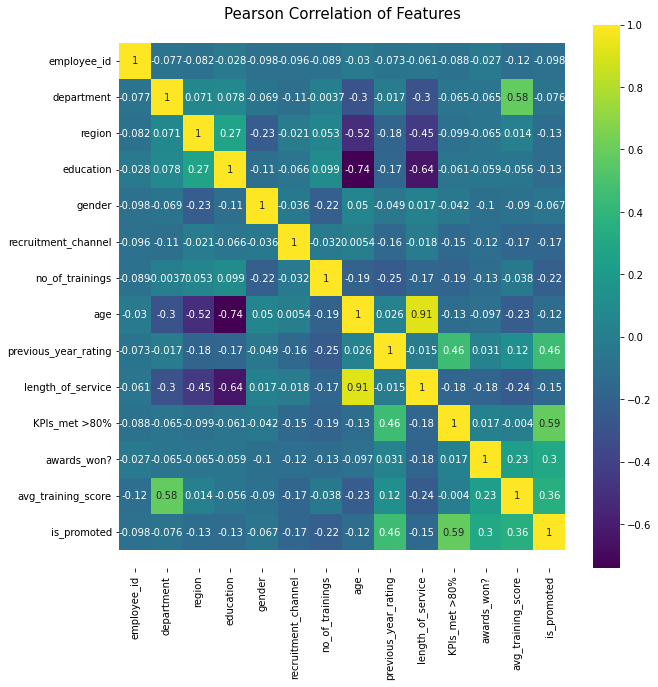

In [20]:
#the heatmap shows the correlation between any 2 variables in the dataframe
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features', size=15)
ax = sns.heatmap(df_numerical.astype(float).corr(), cmap=colormap, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

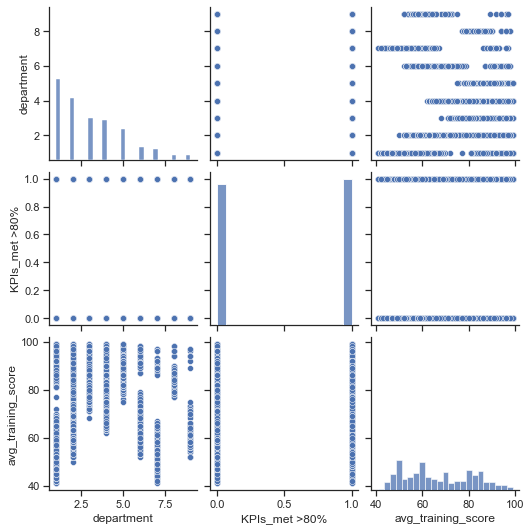

In [21]:
#scatter matrix
sns.set(style="ticks")
sns.pairplot(df_new[['department', 'KPIs_met >80%', 'avg_training_score']])

In [22]:
#remove the feature of employee id because this is not useful in our data modelling
df_new.drop('employee_id', axis=1)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
11,1,7,2,1,1,1,35,5.0,3,1,0,50,1
39,1,28,2,0,1,1,33,5.0,6,1,0,51,1
60,1,4,1,0,3,1,50,4.0,17,1,0,47,1
66,6,22,2,0,3,1,27,3.0,1,1,1,58,1
67,1,22,2,0,1,1,27,3.0,1,0,0,61,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20795,3,31,2,0,3,2,43,4.0,13,0,0,77,0
23088,5,7,2,0,1,1,31,4.0,2,0,0,82,0
24445,2,27,2,0,3,1,33,1.0,6,0,0,59,0
24762,5,24,2,0,3,1,24,3.0,1,0,0,86,0


### 1.4 Export the data

In [23]:
df_new.to_csv('hr_data_new.csv', index = False)

## 2. Airbnb

### 2.1 Load and Explore the data

In [24]:
# Load dataset into a DataFrame
df_airbnb = pd.read_csv('listings.csv')
# Show overview of the dataset
df_airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2013-10-21,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2015-10-01,0.20,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,2019-08-11,0.15,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,2019-07-28,0.22,9,355


In [25]:
#Get information about the features such as dType and count.
df_airbnb.info()
#Get the statistical values about the features.
df_airbnb.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7907 non-null   int64  
 1   name                            7905 non-null   object 
 2   host_id                         7907 non-null   int64  
 3   host_name                       7907 non-null   object 
 4   neighbourhood_group             7907 non-null   object 
 5   neighbourhood                   7907 non-null   object 
 6   latitude                        7907 non-null   float64
 7   longitude                       7907 non-null   float64
 8   room_type                       7907 non-null   object 
 9   price                           7907 non-null   int64  
 10  minimum_nights                  7907 non-null   int64  
 11  number_of_reviews               7907 non-null   int64  
 12  last_review                     51

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,7.907000e+03,7.907000e+03,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,5149.000000,7907.000000,7907.000000
mean,2.338862e+07,9.114481e+07,1.314192,103.848787,169.332996,17.510054,12.807386,1.043669,40.607689,208.726318
std,1.016416e+07,8.190910e+07,0.030577,0.043675,340.187599,42.094616,29.707746,1.285851,65.135253,146.120034
min,4.909100e+04,2.366600e+04,1.243870,103.646560,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.582180e+07,2.305808e+07,1.295795,103.835825,65.000000,1.000000,0.000000,0.180000,2.000000,54.000000
50%,2.470627e+07,6.344891e+07,1.311030,103.849410,124.000000,3.000000,2.000000,0.550000,9.000000,260.000000
75%,3.234850e+07,1.553811e+08,1.322110,103.872535,199.000000,10.000000,10.000000,1.370000,48.000000,355.000000
max,3.811276e+07,2.885676e+08,1.454590,103.973420,10000.000000,1000.000000,323.000000,13.000000,274.000000,365.000000


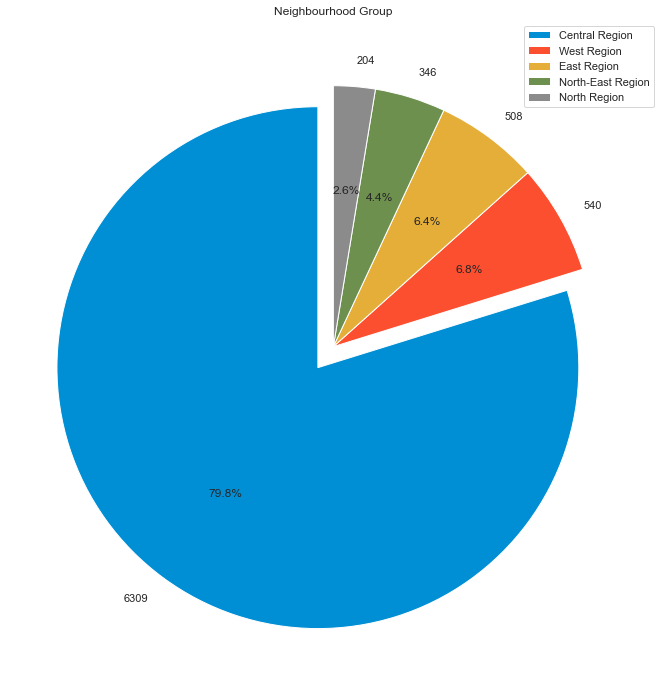

In [26]:
#show the pie chart of the distribution of the listings among different neighbourhood_groups
labels = df_airbnb.neighbourhood_group.value_counts().index
colors = ['#008fd5','#fc4f30','#e5ae38','#6d904f','#8b8b8b']
explode = (0.1,0,0,0,0)
shape = df_airbnb.neighbourhood_group.value_counts().values
plt.figure(figsize=(12,12))
plt.pie(shape, explode = explode, labels=shape, colors= colors, autopct = '%1.1f%%', startangle=90)
plt.legend(labels)
plt.title('Neighbourhood Group')
plt.show()

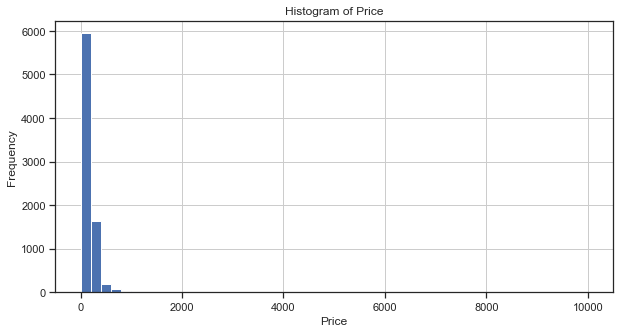

In [27]:
#histogram to show the prices of the listings
plt.hist(df_airbnb['price'].dropna(), bins=50) 
plt.xlabel('Price')                        
plt.ylabel('Frequency')                   
plt.title('Histogram of Price')
plt.grid(True)
plt.show()

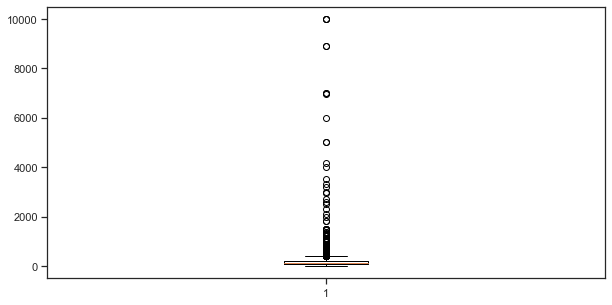

In [28]:
#boxplot to show the outliers of price
plt.boxplot(df_airbnb['price'])
plt.show()

### 2.2 Cleanse and Transform the data

In [29]:
#We can focus on the new subset of the listings from the central region because most of the listings are from this region
df_airbnb['neighbourhood_group'].value_counts()

Central Region       6309
West Region           540
East Region           508
North-East Region     346
North Region          204
Name: neighbourhood_group, dtype: int64

In [30]:
#modify the dataframe to include records with neighbourhood_group as 'Central Region'
df_airbnb=df_airbnb[df_airbnb['neighbourhood_group']=='Central Region']

In [31]:
#to check the information about features in the dataset
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6309 entries, 1 to 7906
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              6309 non-null   int64  
 1   name                            6307 non-null   object 
 2   host_id                         6309 non-null   int64  
 3   host_name                       6309 non-null   object 
 4   neighbourhood_group             6309 non-null   object 
 5   neighbourhood                   6309 non-null   object 
 6   latitude                        6309 non-null   float64
 7   longitude                       6309 non-null   float64
 8   room_type                       6309 non-null   object 
 9   price                           6309 non-null   int64  
 10  minimum_nights                  6309 non-null   int64  
 11  number_of_reviews               6309 non-null   int64  
 12  last_review                     41

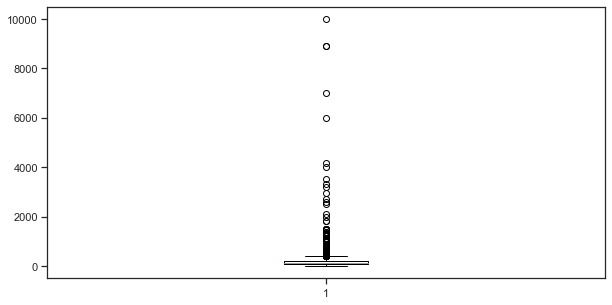

In [32]:
#Plotting a boxplot to find whether there are outliers in the price variable 
plt.boxplot(df_airbnb['price'])
plt.show()

In [33]:
#As we saw there's outliers present. So to remove those we can use the IQR method to find the minimum and maximum values. 
#To get the required data about the price variable we can use the price.describe
df_airbnb['price'].describe()

count     6309.000000
mean       176.629418
std        293.992420
min          0.000000
25%         81.000000
50%        135.000000
75%        208.000000
max      10000.000000
Name: price, dtype: float64

In [34]:
#Q1 = 81.000000
#Q3 = 208.000000
#IQR = Q3 - Q1 = 127
#Max = Q3 + 1.5*IQR = 208 + 1.5*127 = 398.5
#Min = Q1 - 1.5*IQR = 81 - 1.5*127 = -109.5
#Here we are using the Min and Max formulas to remove the outliers. Then we will modify the dataframe to get 
#only the records with price values lesser than 398.5
df_airbnb=df_airbnb[df_airbnb['price']<=398.5]

In [35]:
#For categorical data we need to map these regions to these numerical values as shown.
title_mapping = {"Central Region": 1, "West Region": 2, "East Region": 3, "North-East Region": 4, "North Region": 5} 
df_airbnb['neighbourhood_group'] = df_airbnb['neighbourhood_group'].map(title_mapping).astype(int)
df_airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,1,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365
10,275343,Conveniently located City Room!( (Phone number...,1439258,K2 Guesthouse,1,Bukit Merah,1.28875,103.80814,Private room,44,15,18,2019-04-21,0.23,32,331
11,275344,15 mins to Outram MRT Single Room (B),1439258,K2 Guesthouse,1,Bukit Merah,1.28837,103.81099,Private room,40,30,10,2018-09-13,0.11,32,276
13,294281,5 mins walk from Newton subway,1521514,Elizabeth,1,Newton,1.31125,103.83816,Private room,65,2,125,2019-08-22,1.35,6,336
14,324945,20 Mins to Sentosa @ Hilltop ! (8),1439258,K2 Guesthouse,1,Bukit Merah,1.28976,103.80896,Private room,44,30,13,2019-02-02,0.15,32,340


In [36]:
#For categorical data we need to map these regions to these numerical values as shown.
title_mapping = {"Entire home/apt": 1, "Private room": 2, "Shared room": 3} 
df_airbnb['room_type'] = df_airbnb['room_type'].map(title_mapping).astype(int)
df_airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,1,Bukit Timah,1.33235,103.78521,2,81,90,18,2014-12-26,0.28,1,365
10,275343,Conveniently located City Room!( (Phone number...,1439258,K2 Guesthouse,1,Bukit Merah,1.28875,103.80814,2,44,15,18,2019-04-21,0.23,32,331
11,275344,15 mins to Outram MRT Single Room (B),1439258,K2 Guesthouse,1,Bukit Merah,1.28837,103.81099,2,40,30,10,2018-09-13,0.11,32,276
13,294281,5 mins walk from Newton subway,1521514,Elizabeth,1,Newton,1.31125,103.83816,2,65,2,125,2019-08-22,1.35,6,336
14,324945,20 Mins to Sentosa @ Hilltop ! (8),1439258,K2 Guesthouse,1,Bukit Merah,1.28976,103.80896,2,44,30,13,2019-02-02,0.15,32,340


In [37]:
#to check for the number of missing values.
df_airbnb.isnull().sum()

id                                   0
name                                 1
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2022
reviews_per_month                 2022
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [38]:
#here we can see the correlation between the "number_of_reviews" and "reviews_per_month". The reviews per month are approximately 1/100th of number of reviews.
df_airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,1,Bukit Timah,1.33235,103.78521,2,81,90,18,2014-12-26,0.28,1,365
10,275343,Conveniently located City Room!( (Phone number...,1439258,K2 Guesthouse,1,Bukit Merah,1.28875,103.80814,2,44,15,18,2019-04-21,0.23,32,331
11,275344,15 mins to Outram MRT Single Room (B),1439258,K2 Guesthouse,1,Bukit Merah,1.28837,103.81099,2,40,30,10,2018-09-13,0.11,32,276
13,294281,5 mins walk from Newton subway,1521514,Elizabeth,1,Newton,1.31125,103.83816,2,65,2,125,2019-08-22,1.35,6,336
14,324945,20 Mins to Sentosa @ Hilltop ! (8),1439258,K2 Guesthouse,1,Bukit Merah,1.28976,103.80896,2,44,30,13,2019-02-02,0.15,32,340


In [39]:
#the reviews per month is calculated based on the number of reviews / 100 ~ approx
df_airbnb['reviews_per_month'].fillna((df_airbnb['number_of_reviews'])/100, inplace=True)

In [40]:
#to obtain the minimum date value of the "last_review".
temp = pd.to_datetime(df_airbnb['last_review'])
temp.min()

Timestamp('2014-06-28 00:00:00')

In [41]:
#the missing date value in last review means that the last review done on the listing may have been entered just before the minimum date value
#here we are assuming that the missing last_review date is just before the min date
min_date = '2014-06-27'
df_airbnb['last_review'].fillna(min_date, inplace=True)

In [42]:
#We are creating a new feature called 'no_of_days_since_lastreview' which shows the number of days since the 'last_review'. 
#The difference in days are calculated 
#and converted to days 
temp = pd.to_datetime(df_airbnb['last_review'])
max = temp.max()
no_of_days = (max-temp).dt.days
df_airbnb['no_of_days_since_lastreview'] = no_of_days

In [43]:
#all missing values and categorical values are now handled and there's also a new feature which shows the number of days since last review.
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5995 entries, 1 to 7906
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5995 non-null   int64  
 1   name                            5994 non-null   object 
 2   host_id                         5995 non-null   int64  
 3   host_name                       5995 non-null   object 
 4   neighbourhood_group             5995 non-null   int32  
 5   neighbourhood                   5995 non-null   object 
 6   latitude                        5995 non-null   float64
 7   longitude                       5995 non-null   float64
 8   room_type                       5995 non-null   int32  
 9   price                           5995 non-null   int64  
 10  minimum_nights                  5995 non-null   int64  
 11  number_of_reviews               5995 non-null   int64  
 12  last_review                     59

In [44]:
#THE CODE BLOCKS SHOWN BELOW ARE PURPOSEFULLY COMMENTED AND NOT TO BE USED. THIS IS LEFT HERE TO ILLUSTRATE THE FURTHER FIXES DONE TO THE CODE AFTER THE PRESENTATION
#DO NOT UNCOMMENT AND RUN THE COMMENTED CODE BELOW.

In [45]:
# #To handle the missing values for 'no_of_days_since_lastreview' we are getting the mode of this features and filling the missing values with that mode
# mode_days=df_airbnb['no_of_days_since_lastreview'].mode()[0]

In [46]:
# #use fillna to replace missing values
# df_airbnb['no_of_days_since_lastreview'].fillna(mode_days, inplace = True)

In [47]:
# #the missing date value in last review means that the last review done on the listing may have been entered just before the minimum date value
# na_date = '2014-06-28'
# df_airbnb['last_review'].fillna(na_date, inplace=True)

In [48]:
# #fill in the missing values for 'review_per_month' using the median of the feature.
# df_airbnb['reviews_per_month'].fillna((df_airbnb['number_of_reviews'])/100, inplace=True)

In [49]:
# #convert the 'last_review' feature values to datetime and then convert them to integer.
# df_airbnb['last_review']=pd.to_datetime(df_airbnb['last_review'])
# df_airbnb['last_review']=df_airbnb['last_review'].dt.strftime("%Y%m%d").astype(int)

### 2.3 Correlation Analysis

In [50]:
#drop the unwanted variables.
df_airbnb= df_airbnb.drop(['id','name','host_id','host_name','neighbourhood', 'neighbourhood_group', 'last_review'], axis = 1)

In [51]:
#Correlation between numerical values
df_airbnb.corr()

,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,no_of_days_since_lastreview
latitude,1.000000,0.319670,-0.066762,0.004859,-0.049602,0.009734,-0.011270,0.045815,-0.020498,0.017492
longitude,0.319670,1.000000,-0.093989,0.003668,-0.110870,0.079032,0.083151,0.125438,-0.042456,-0.040373
room_type,-0.066762,-0.093989,1.000000,-0.604584,0.008107,0.026566,-0.009100,-0.308829,0.068237,-0.021952
price,0.004859,0.003668,-0.604584,1.000000,-0.089466,-0.057640,0.011089,0.179259,0.071346,0.044460
minimum_nights,-0.049602,-0.110870,0.008107,-0.089466,1.000000,-0.103775,-0.168531,0.019516,0.160096,0.209374
number_of_reviews,0.009734,0.079032,0.026566,-0.057640,-0.103775,1.000000,0.669646,-0.177613,-0.083902,-0.375996
reviews_per_month,-0.011270,0.083151,-0.009100,0.011089,-0.168531,0.669646,1.000000,-0.218134,-0.128363,-0.531830
calculated_host_listings_count,0.045815,0.125438,-0.308829,0.179259,0.019516,-0.177613,-0.218134,1.000000,0.249099,0.111219
availability_365,-0.020498,-0.042456,0.068237,0.071346,0.160096,-0.083902,-0.128363,0.249099,1.000000,0.043067
no_of_days_since_lastreview,0.017492,-0.040373,-0.021952,0.044460,0.209374,-0.375996,-0.531830,0.111219,0.043067,1.000000


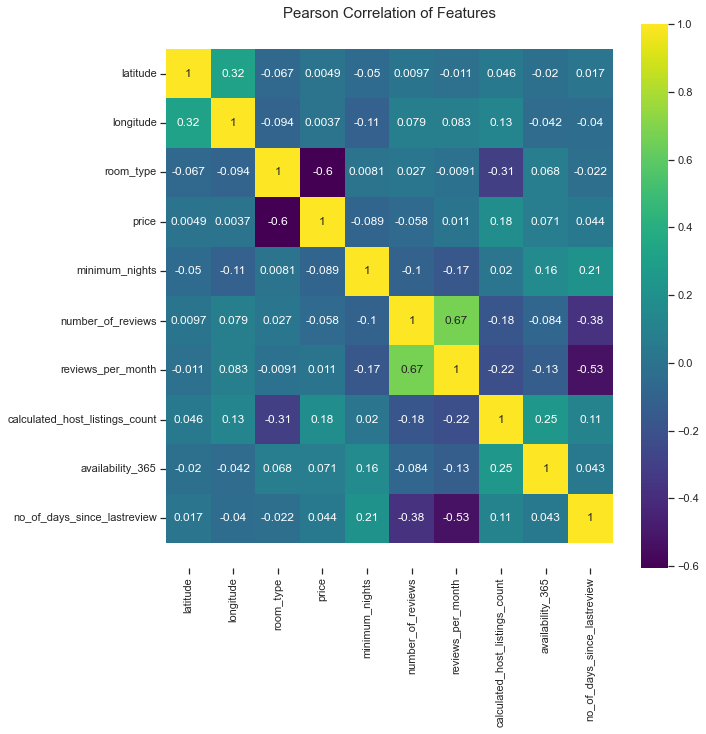

In [52]:
#Pearson correlation using a heatmap
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features', size=15)
ax = sns.heatmap(df_airbnb.corr(), cmap=colormap, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

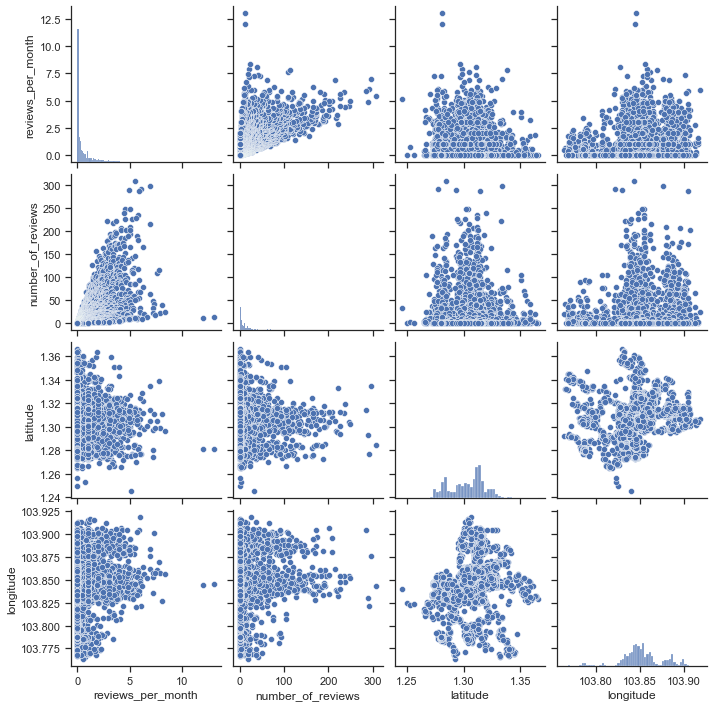

In [53]:
#scatter matrix
sns.set(style="ticks")
sns.pairplot(df_airbnb[['reviews_per_month', 'number_of_reviews', 'latitude', 'longitude']])

In [54]:
#check the dataframe to see all missing values and categorical value are handled.
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5995 entries, 1 to 7906
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   latitude                        5995 non-null   float64
 1   longitude                       5995 non-null   float64
 2   room_type                       5995 non-null   int32  
 3   price                           5995 non-null   int64  
 4   minimum_nights                  5995 non-null   int64  
 5   number_of_reviews               5995 non-null   int64  
 6   reviews_per_month               5995 non-null   float64
 7   calculated_host_listings_count  5995 non-null   int64  
 8   availability_365                5995 non-null   int64  
 9   no_of_days_since_lastreview     5995 non-null   int64  
dtypes: float64(3), int32(1), int64(6)
memory usage: 620.8 KB


### 2.4 Export the data

In [55]:
df_airbnb.to_csv('listings_new.csv', index=False)